In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing liabries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
f=pd.read_csv("FuelConsumption.csv")
f.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
f.shape

(1067, 13)

In [5]:
# Checking for null values
f.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
f.drop(["MODELYEAR"],axis=1,inplace=True)

In [7]:
f.head(3)

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


In [8]:
y=f.select_dtypes(include=["int64","int32","float64"])
y.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [9]:
x=f.select_dtypes(include=["object"])
x.head()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z


### Handling the Categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder
for col in x:
    le=LabelEncoder()
    x[col]=le.fit_transform(x[col])

In [11]:
x.head()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,0,329,0,10,3
1,0,329,0,20,3
2,0,330,0,17,3
3,0,389,11,11,3
4,0,483,11,11,3


In [12]:
df=pd.concat([x,y],axis=1)
df.head(3)

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,329,0,10,3,2.0,4,9.9,6.7,8.5,33,196
1,0,329,0,20,3,2.4,4,11.2,7.7,9.6,29,221
2,0,330,0,17,3,1.5,4,6.0,5.8,5.9,48,136


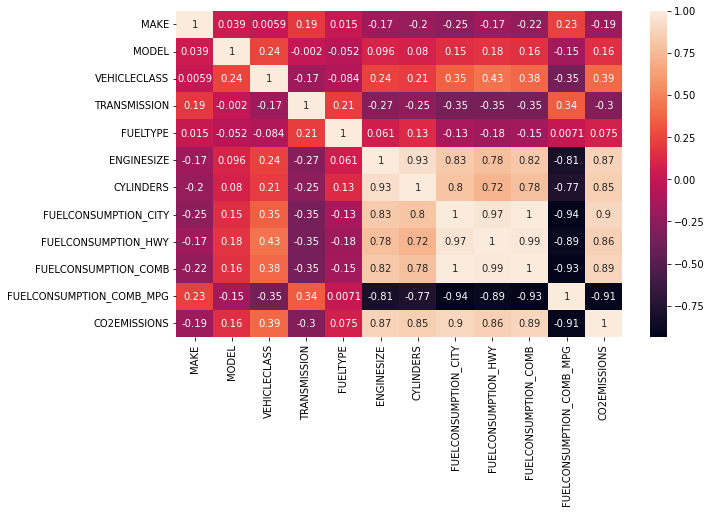

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True);

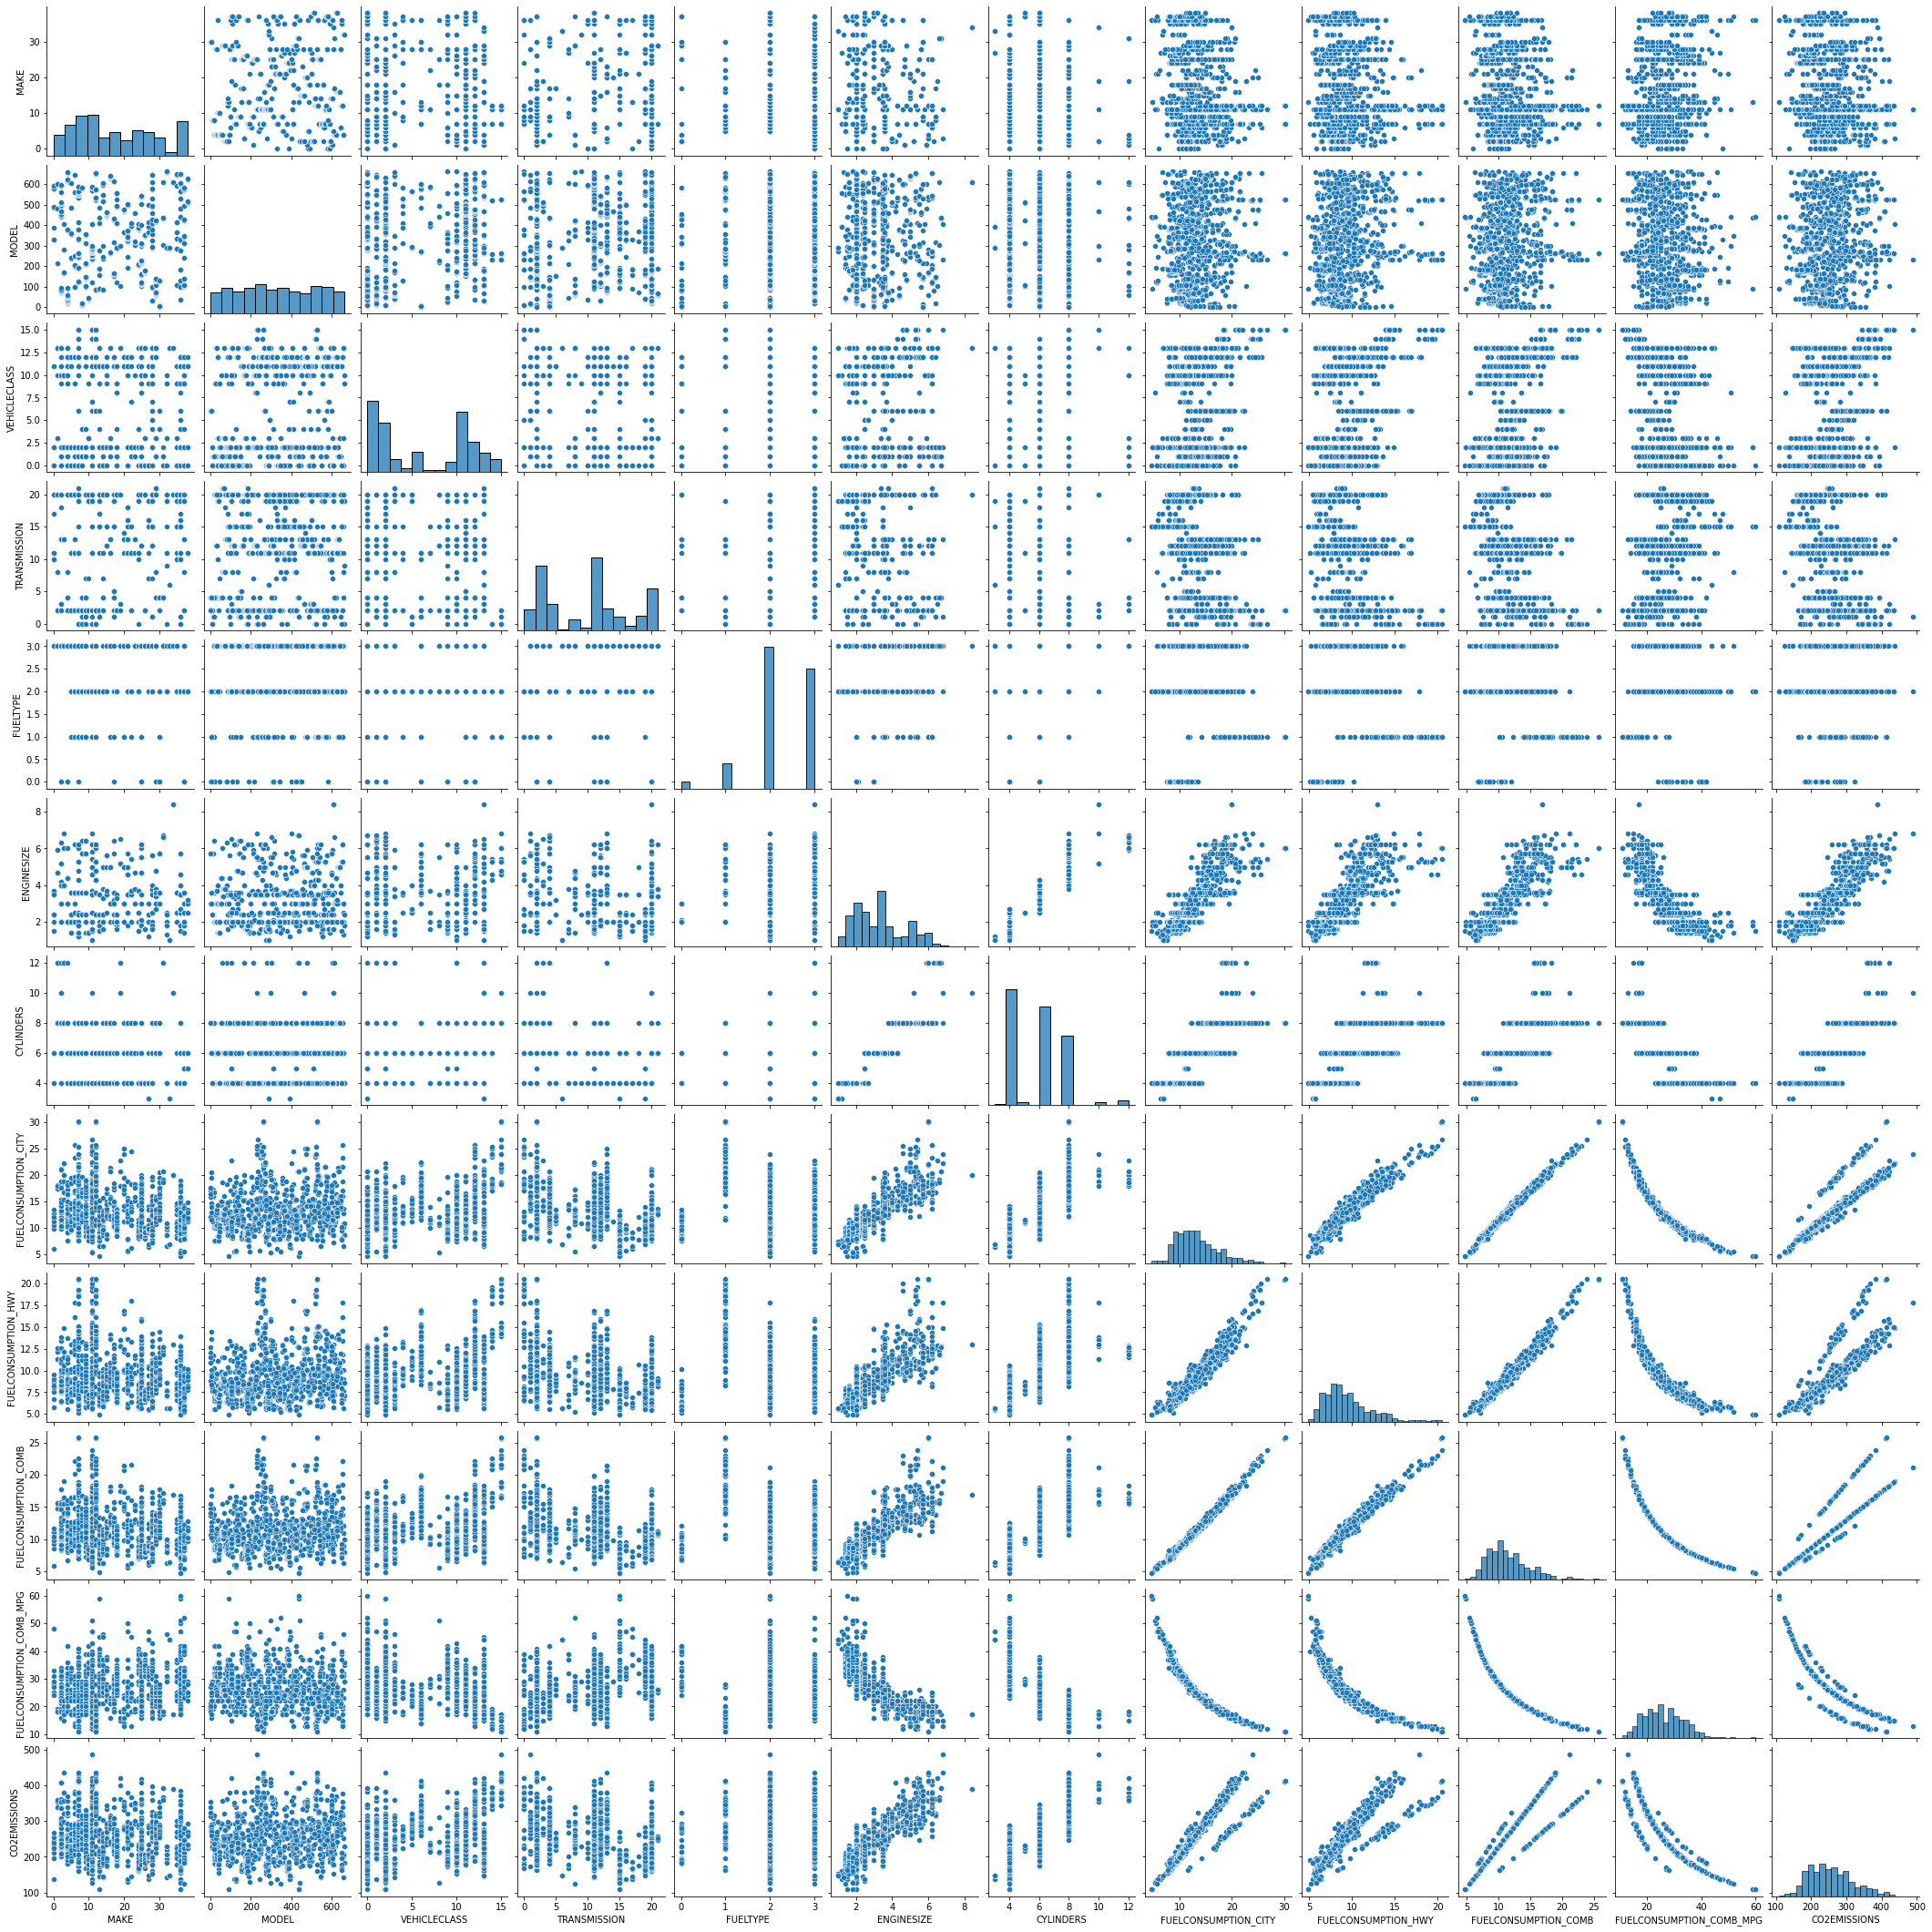

In [14]:
# Pairplot
sns.pairplot(df);

In [15]:
#Handling Outliers
for cols in df.columns[:]:
    Q1=df[cols].quantile(q=0.25)
    Q3=df[cols].quantile(q=0.75)
    iqr=Q3-Q1
    
    low=Q1-1.5*(Q3-Q1)
    high=Q3+1.5*(Q3-Q1)
    df.loc[(df[cols]<low) | (df[cols]>high),cols]=df[cols].median()

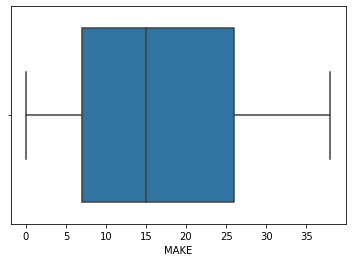

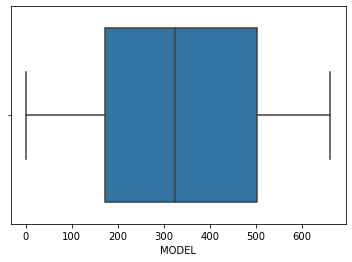

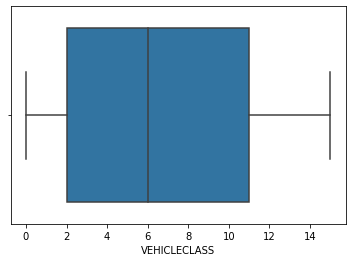

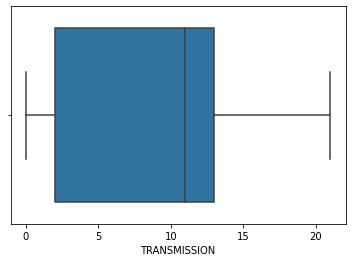

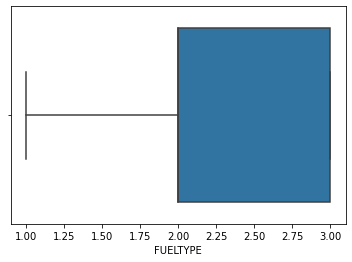

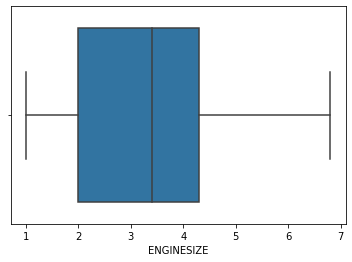

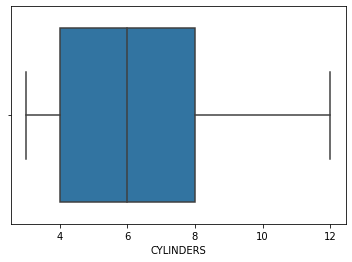

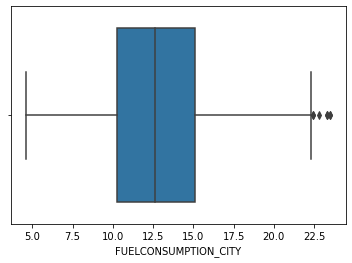

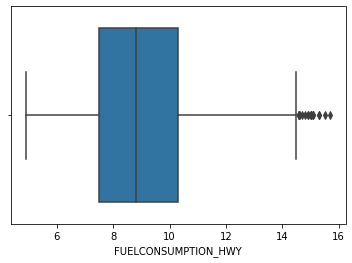

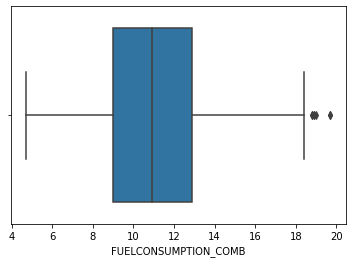

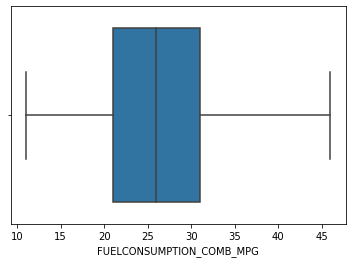

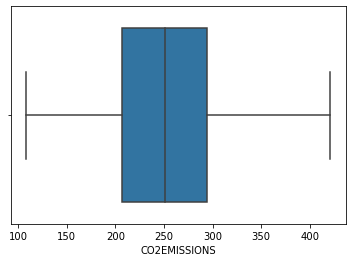

In [16]:
for col in df:
    sns.boxplot(df[col]);
    plt.show();

### Handling the skewness in the data

MAKE
0.35037003216307355


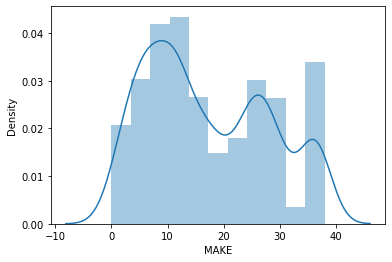

MODEL
0.02836278774686506


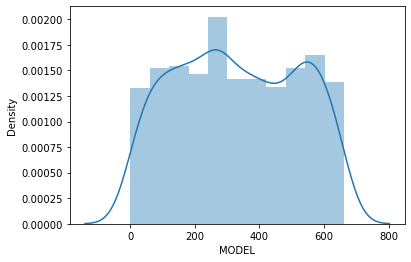

VEHICLECLASS
0.09433597553163915


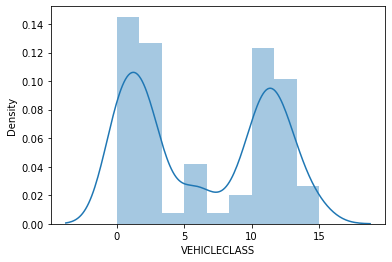

TRANSMISSION
0.1403768870263513


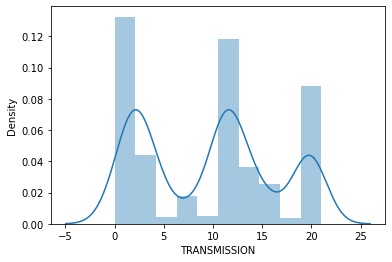

FUELTYPE
-0.3595303605197583


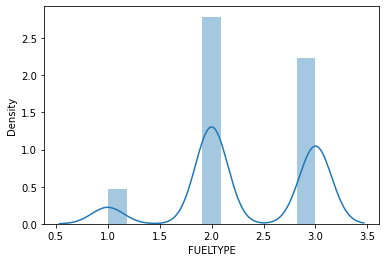

ENGINESIZE
0.5196332533349618


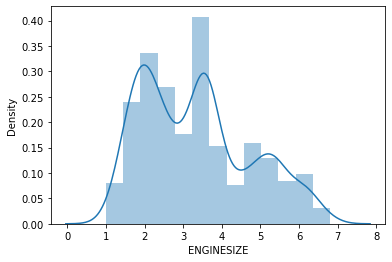

CYLINDERS
0.7946351967974735


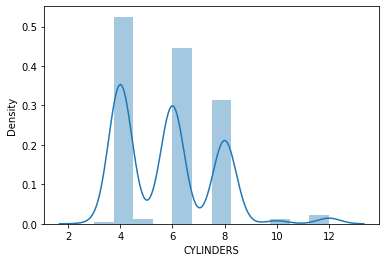

FUELCONSUMPTION_CITY
0.5423317009357921


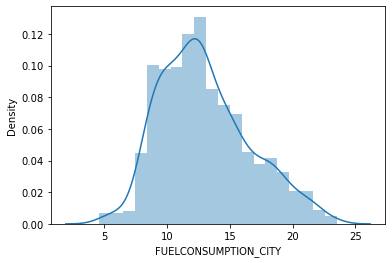

FUELCONSUMPTION_HWY
0.7030693800340434


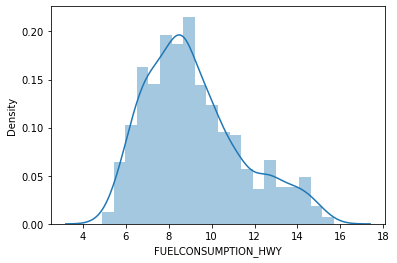

FUELCONSUMPTION_COMB
0.5764519623935804


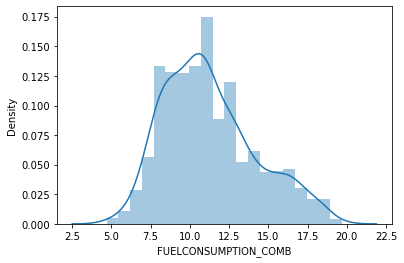

FUELCONSUMPTION_COMB_MPG
0.23481436203467246


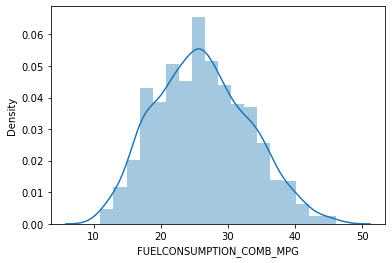

CO2EMISSIONS
0.4507791216008783


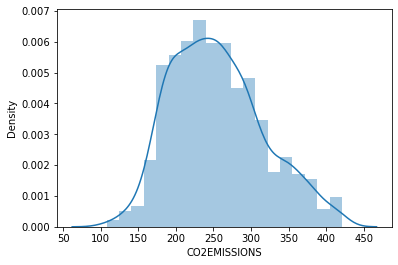

In [17]:
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]));
    sns.distplot(df[col]);
    plt.show()

In [18]:
#Handling skewness
import numpy as np
s=["CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB",]
for col in s:
    df[col]=np.sqrt(df[col])

CYLINDERS
0.48617188891111346


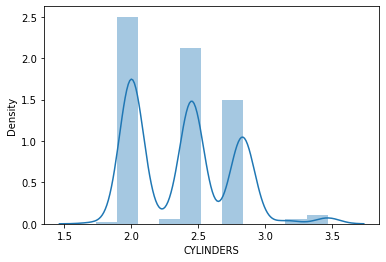

FUELCONSUMPTION_CITY
0.21185463636367022


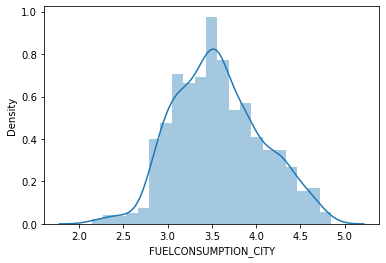

FUELCONSUMPTION_HWY
0.45374399830636697


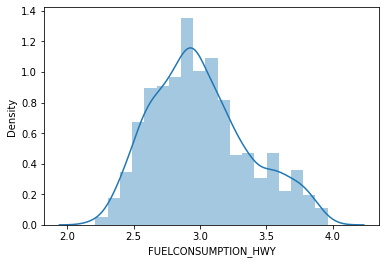

FUELCONSUMPTION_COMB
0.2951579976756971


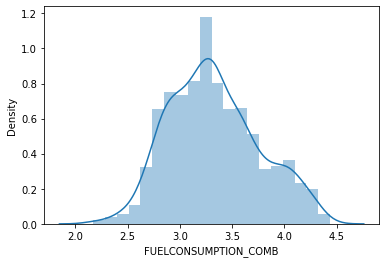

In [19]:
for col in s:
    print(col)
    print(skew(df[col]))
    sns.distplot(df[col]);
    plt.show();

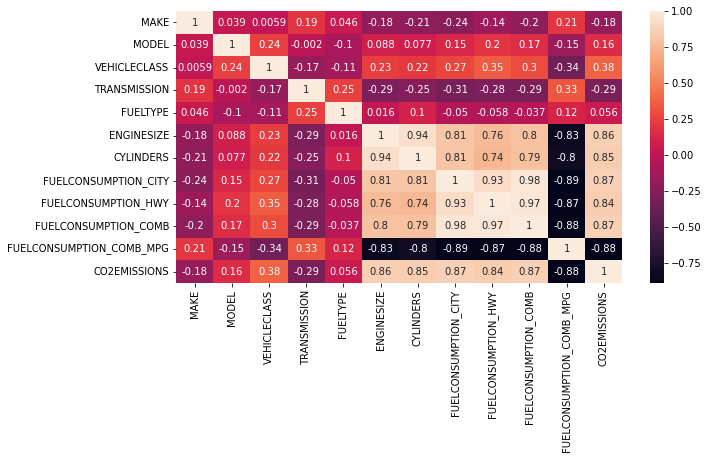

In [20]:
plt.figure(figsize=(10,5));
sns.heatmap(df.corr(),annot=True);

## Linear regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [22]:
X=df['ENGINESIZE'].values.reshape(-1,1)
y=df['CO2EMISSIONS'].values

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_test_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)

In [25]:
r2_score(y_train,y_train_pred)

0.7431915970915892

In [26]:
r2_score(y_test,y_test_pred)

0.692061833694239

In [27]:
#KFold for Linear
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(lr,X_train,y_train,cv=fold)
score_test=cross_val_score(lr,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.74487018 0.7171002  0.80693153 0.66693581 0.73792358]
[0.64758987 0.73262187 0.78460204 0.50181124 0.69477943]

acc_score_train : 0.7347522593102394
acc_score_test : 0.6722808885755505


In [28]:
#Lasso
from sklearn.linear_model import Lasso
lso=Lasso()
lso.fit(X_train,y_train)
print("lasso_train:",lso.score(X_train,y_train))
print("lasso_test:",lso.score(X_test,y_test))

lasso_train: 0.7430529415368586
lasso_test: 0.6923598003866565


In [29]:
#Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
print("Ridge_train_score:",ridge.score(X_train,y_train))
print("Ridge_test_score:",ridge.score(X_test,y_test))

Ridge_train_score: 0.7431913224242195
Ridge_test_score: 0.6920809217498567


In [30]:
#ElasticNet
from sklearn.linear_model import ElasticNet
enet=ElasticNet()
enet.fit(X_train,y_train)
print("ENet_train_score:",enet.score(X_train,y_train))
print("ENet_train_score:",enet.score(X_test,y_test))

ENet_train_score: 0.7099725154356433
ENet_train_score: 0.6659715020521306


In [31]:
#KFold for Ridge
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

ridge = Ridge()
fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(ridge,X_train,y_train,cv=fold)
score_test=cross_val_score(ridge,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.74499633 0.71702219 0.80683666 0.66703905 0.73792278]
[0.64766124 0.73228941 0.78399245 0.50291763 0.69480964]

acc_score_train : 0.7347634036319409
acc_score_test : 0.6723340752531751


**In Simple Linear Regression cross validation for Ridge gives the 0.6723 r2 score**

## Multiple regression

In [32]:
from sklearn.metrics import *

In [33]:
X=df.drop(["CO2EMISSIONS"],axis=1)
y=df['CO2EMISSIONS'].values

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_test_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)

In [36]:
r2_score(y_train,y_train_pred)

0.8747077342980616

In [37]:
r2_score(y_test,y_test_pred)

0.8441738805185195

**Multiple Linear Regression gives the0.8441 r2 score**

In [38]:
#KFold for Linear
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(lr,X_train,y_train,cv=fold)
score_test=cross_val_score(lr,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.88894204 0.85453946 0.88790708 0.82059057 0.86821067]
[0.89637403 0.90470748 0.83464304 0.46121655 0.85391504]

acc_score_train : 0.8640379652060106
acc_score_test : 0.7901712287644898


**Cross validation for Multiple Linear Regression gives the 0.7901 r2 score**

In [39]:
#Lasso
from sklearn.linear_model import Lasso
lso=Lasso(alpha=.1)
lso.fit(X_train,y_train)
print("Lasso_train_score:",lso.score(X_train,y_train))
print("Lasso_test_score:",lso.score(X_test,y_test))

Lasso_train_score: 0.8745512551301449
Lasso_test_score: 0.84022474568727


In [40]:
#Ridge
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=.1)
ridge.fit(X_train,y_train)
print("Ridge_train_score:",ridge.score(X_train,y_train))
print("Ridge_test_score:",ridge.score(X_test,y_test))

Ridge_train_score: 0.8747069521074404
Ridge_test_score: 0.8441287364700842


In [41]:
#ElasticNet
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=.1)
enet.fit(X_train,y_train)
print("ENet_train_score:",enet.score(X_train,y_train))
print("ENet_train_score:",enet.score(X_test,y_test))

ENet_train_score: 0.8717198967326526
ENet_train_score: 0.8308505685899938


In [42]:
#KFold for Ridge
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(ridge,X_train,y_train,cv=fold)
score_test=cross_val_score(ridge,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.8891752  0.85458269 0.88796628 0.82062455 0.86825332]
[0.89702613 0.90500632 0.8340689  0.80550345 0.85643135]

acc_score_train : 0.8641204053295322
acc_score_test : 0.8596072306745739


**Ridge Regulization gives the 0.8441 r2 score &  cross validation for ridge gives 0.8596 r2 score**

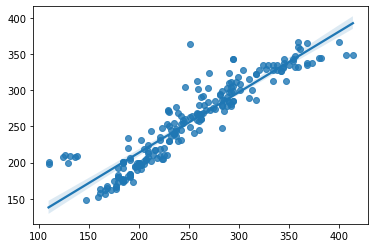

In [43]:
sns.regplot(y_test,y_test_pred);

**After observing this plot we can see there is close prediction So we can say our module is good.**

In [44]:
meanAbErr = metrics.mean_absolute_error(y_test, y_test_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_test_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', meanAbErr);
print('Mean Square Error:', meanSqErr);
print('Root Mean Square Error:', rootMeanSqErr);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Absolute Error: 16.365919201365212
Mean Square Error: 632.4592148088603
Root Mean Square Error: 25.14874181363474


In [45]:
result=pd.DataFrame({'Actual':y_test,"Predicted":y_test_pred})
result.head()

,Actual,Predicted
0,356,346.891448
1,209,213.146404
2,230,230.118268
3,212,243.987296
4,168,167.894369
